In [1]:
%load_ext autoreload
%matplotlib ipympl
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import bpy
from bpy.types import bpy_prop_array
import mathutils
import numpy as np
import clipboard

In [2]:
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [3]:
%autoreload 2
from Logic.node_readers_writers import *
from Logic.network_manager import NetworkManager
from Logic.meta_network import *
from Logic.structures_definitions import *
from Logic.variations_creator import *

In [4]:
self = NetworkManager()
self.initialize_network()
self.generate_random_network(n_additions=4)
self.finish_network()

code = self.generate_code(with_initialization_code=True)
clipboard.copy(code)
# self.draw_network()

In [7]:
manager = MetaNetworkManager(ALL_META_NODES, max_layers=2, n_additions=3)
manager.generate_network()
nm = manager.meta_network_to_flat_network()

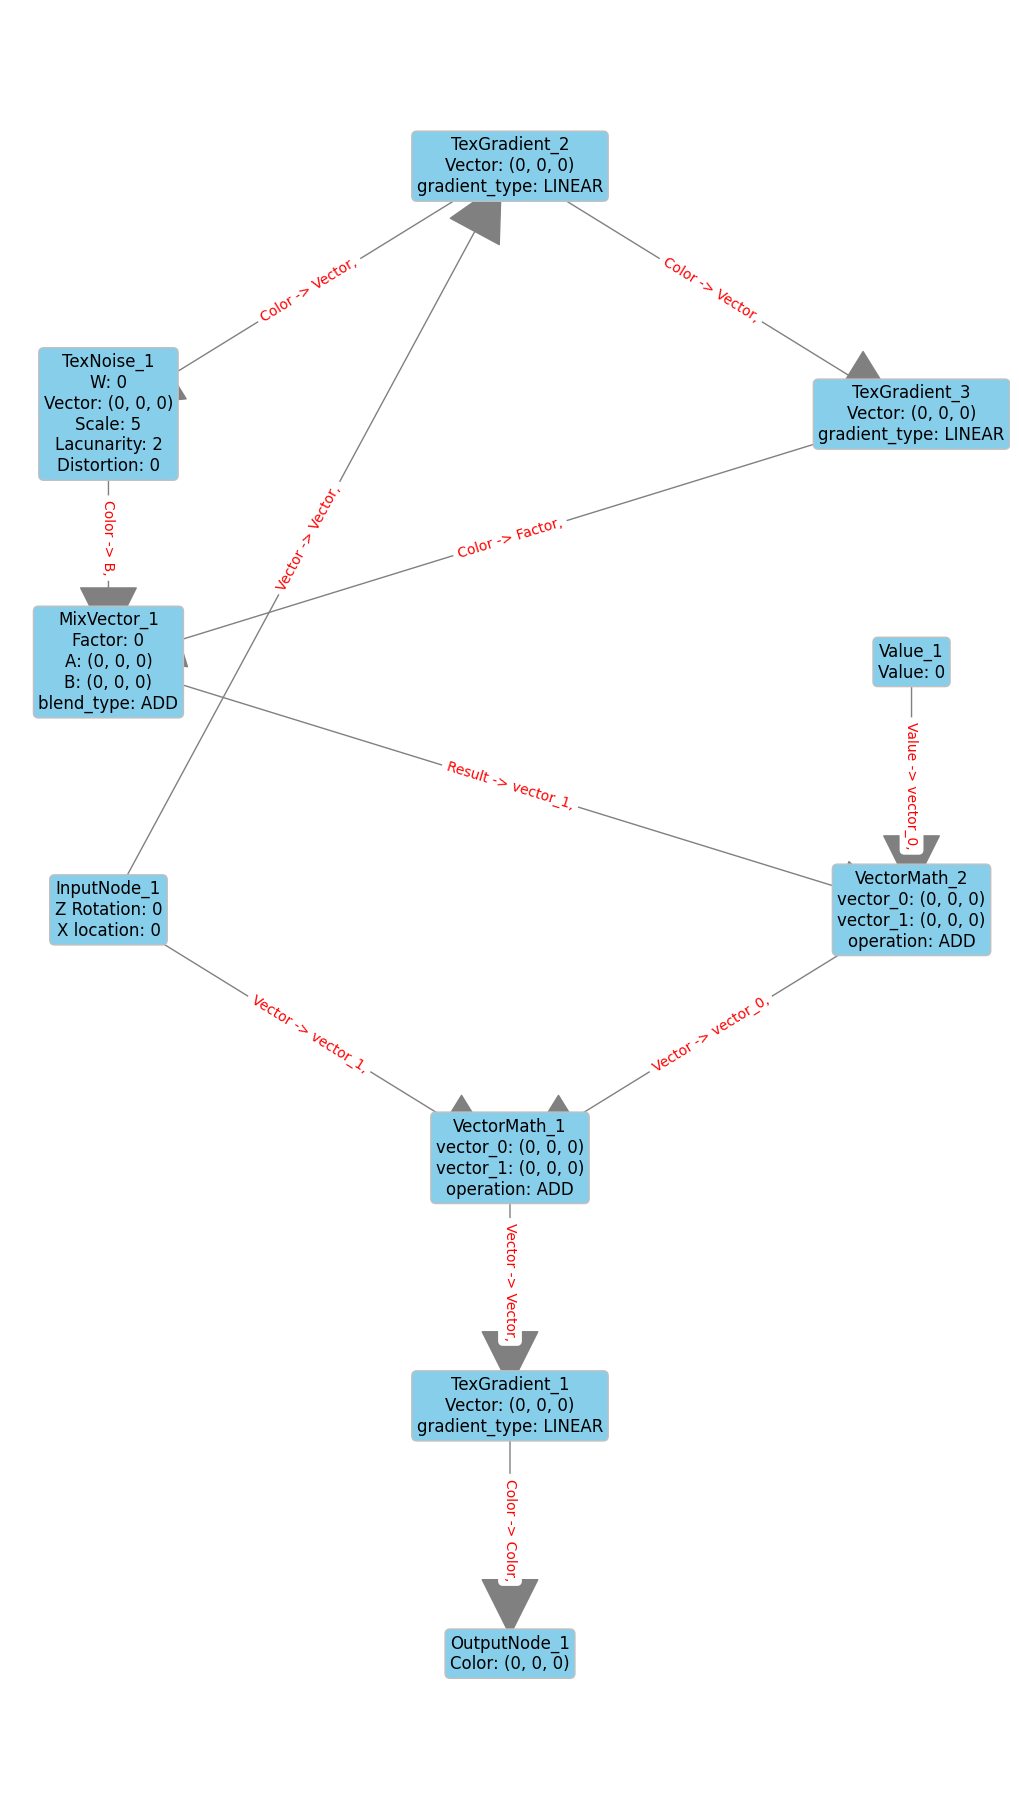

In [8]:
nm.draw_network()

In [ ]:
# remove nodes randomly - not out or input
# make sure the reverse of all those steps is the exact origin network

In [9]:
nm.network.nodes()

NodeView(('OutputNode_1', 'InputNode_1', 'Value_1', 'TexGradient_1', 'VectorMath_1', 'VectorMath_2', 'MixVector_1', 'TexGradient_2', 'TexNoise_1', 'TexGradient_3'))

In [20]:
list(nm.network.successors('InputNode_1'))

['VectorMath_1', 'TexGradient_2']

In [18]:
list(nm.network.predecessors('OutputNode_1'))

['TexGradient_1']

In [ ]:
def change_seed(nm):
    return non_structural_changes(nm, 3, ParamRequestType.SEED)

def change_numeric(nm):
    return non_structural_changes(nm, 3, ParamRequestType.NUMERIC)

def change_params(nm):
    return non_structural_changes(nm, 3, ParamRequestType.NON_SEED)

funcs = [change_seed, change_numeric, change_params, add_random_node_on_edge, add_random_edge, remove_random_edge, remove_random_node]


In [8]:
for i in range(1000):
    manager = MetaNetworkManager(ALL_META_NODES, max_layers=2, n_additions=3)
    manager.generate_network()
    nm = manager.meta_network_to_flat_network()

    for i in range(5):
        func = np.random.choice(funcs)
        variation_desc = func(nm)
        for variation in variation_desc.steps_forward:
            apply_variation(nm, variation)
    
    old_network = nm.copy()
    func = np.random.choice(funcs)   
    variation_desc = func(nm)
    for variation in variation_desc.steps_forward:
        apply_variation(nm, variation)
    
    for variation in variation_desc.steps_backward:
        apply_variation(nm, variation)
    
    should_compare_props = func in [change_seed, change_numeric, change_params]
    nodes, edges = nm.network_data_for_comparison()
    old_nodes, old_edges = old_network.network_data_for_comparison()
    assert NetworkManager.compare_networks(nodes, edges, old_nodes, old_edges, compare_node_properties=True)